In [1]:
### 2019-12-18 at Office


import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from  torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.models as models
#import lenstronomy.Util.image_util as image_util
import os, sys
import h5py
import pandas as pd
import numpy as np
import scipy.ndimage
from scipy.ndimage import gaussian_filter
from scipy.ndimage import rotate
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import gc
import astropy
from astropy.io import fits
from astropy.table import Table


root_folder = "/media/joshua/HDD_fun2/Public/"
loaded_model_path = './saved_model/2019-12-19n_sources_resnet18.mdl'

# EHT_test_path = root_folder + test_folder
# files = os.listdir(EHT_test_path)
#loaded_model_path = './saved_model/flux_resnet18.mdl'


if os.path.exists(loaded_model_path):
    net = torch.load(loaded_model_path)
    print('loaded mdl！')
else:
    print('No model to load. Should stop!')
    
print(os.getcwd())

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
data_transform = transforms.Compose([
            transforms.ToTensor(), # scale to [0,1] and convert to tensor
            normalize,
            ])
target_transform = torch.Tensor




loaded mdl！
/home/joshua/Documents/git_work_zone/Lens_Finder


In [2]:

glo_batch_size = 1
test_num_batch = 1

class LensDataset(Dataset): # torch.utils.data.Dataset
    def __init__(self, root_dir, train=True, transform=None, target_transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform
        self.train = train# training set or test set


        if self.train:
            self.path = root_dir#os.path.join(self.root_dir, self.train_folder)
            self.df = pd.read_csv(self.path + '/train.csv')

        else:
            self.path = root_dir#os.path.join(self.root_dir, self.test_folder)
            self.df = pd.read_csv(self.path + '/val.csv')

    def __getitem__(self, index):

        #print(self.df['ID'])
        ID = self.df['ID'].iloc[[index]]
        n_sources = self.df['n_sources'].iloc[[index]]
        n_source_im = self.df['n_source_im'].iloc[[index]]
        print("n_source_im:", n_source_im.values[0])
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        mag_eff = self.df['mag_eff'].iloc[[index]]
        print("mag_eff", mag_eff.values[0])
        if mag_eff.values[0] < 1.2 or np.isnan(mag_eff.values[0]):
            criteria = 0.
        elif mag_eff.values[0] >= 2.0:
            criteria = 1.
        else:
            criteria = 0.5
        print("criteria", criteria)
        image = np.zeros((4, 224, 224))
        try:
            for i, channel in enumerate(channel_names):

                filepath = self.path + channel + "/image" + channel + "-" + str(ID.values[0]) + ".fits"
                lens_data = fits.open(filepath)
                img = lens_data[0].data
                img *= 10e8
                img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
                image[i, :, :] += img_channel_0
        except:
            print("error", ID)
            pass



        # if self.transform is not None:
        #     image = self.transform(image)

        return image, ID.values[0], n_sources.values[0]

    def __len__(self):
        return self.df.shape[0]


In [3]:
test_loader = torch.utils.data.DataLoader(LensDataset(root_folder, train=False, transform=data_transform, target_transform=target_transform),
            batch_size = glo_batch_size, shuffle = True
            )

n_source_im: 1
mag_eff 9.09406
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9386338
______
n_source_im: 1
mag_eff 2.13657
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.7810891
______
n_source_im: 2
mag_eff 3.3533800000000005
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9960395
______
n_source_im: 2
mag_eff 2.5303299999999997
criteria 1.0


/home/joshua/miniconda3/lib/python3.7/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


n_sources (ground truth) 1.0
n_sources prediction: 0.6959736


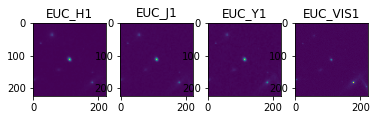

______
n_source_im: 1
mag_eff 2.25488
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.98468024
______
n_source_im: 0
mag_eff 2.54268
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.8267391
______
n_source_im: 2
mag_eff 2.08692
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.93140274
______
n_source_im: 1
mag_eff 3.2608099999999998
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.96162957
______
n_source_im: 2
mag_eff 2.2369
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.90610075
______
n_source_im: 1
mag_eff 2.11679
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9117526
______
n_source_im: 1
mag_eff 5.23201
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.81931263
______
n_source_im: 0
mag_eff 1.60257
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.7574373
______
n_source_im: 2
mag_eff 8.99025
criteria 1.0
n_sources (ground truth) 1.0
n_sources

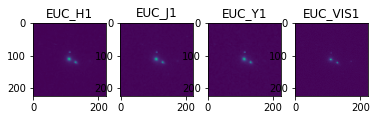

______
n_source_im: 1
mag_eff 1.72812
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.89450616
______
n_source_im: 1
mag_eff 2.49951
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.94491374
______
n_source_im: 0
mag_eff nan
criteria 0.0
n_sources (ground truth) 0.0
n_sources prediction: 0.8308542
______
n_source_im: 1
mag_eff 2.06025
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.7345302
______
n_source_im: 2
mag_eff 4.03543
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9977489
______
n_source_im: 2
mag_eff 5.5475699999999994
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.78578585
______
n_source_im: 2
mag_eff 1.86495
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.9885053
______
n_source_im: 2
mag_eff 2.80146
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9846721
______
n_source_im: 0
mag_eff nan
criteria 0.0
n_sources (ground truth) 0.0
n_sources predicti

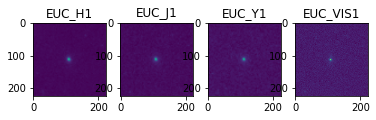

______
n_source_im: 3
mag_eff 6.5081
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.85009927
______
n_source_im: 2
mag_eff 1.5179200000000002
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.8399709
______
n_source_im: 1
mag_eff 2.4020200000000003
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.8316462
______
n_source_im: 2
mag_eff 1.3445200000000002
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.99433774
______
n_source_im: 1
mag_eff 1.6762099999999998
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.8513941
______
n_source_im: 2
mag_eff 1.46815
criteria 0.5
n_sources (ground truth) 1.0
n_sources prediction: 0.99642
______
n_source_im: 2
mag_eff 2.5381400000000003
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9072039
______
n_source_im: 2
mag_eff 2.03357
criteria 1.0
n_sources (ground truth) 1.0
n_sources prediction: 0.9864704
______
n_source_im: 1
mag_eff 2.13266
criteria 1.0

In [4]:
net.cuda()




for batch_idx, (data, ID, n_sources) in enumerate(test_loader):
    data, target = data.float(), n_sources.float()
    data, target = Variable(data).cuda(), Variable(target).cuda()
    data, target = data, target.unsqueeze(1)
    
    #print("n_source", n_sources)
   
    

    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    #img = scipy.ndimage.zoom(img, 1.4, order=1)
    
    print("n_sources (ground truth)", target.cpu().numpy()[0][0])
    output = net(data)
    output = F.sigmoid(output)
    
    print("n_sources prediction:", output.data.cpu().numpy()[0][0])
    
    if output.data.cpu().numpy()[0][0] < 0.7:
        image = np.zeros((4, 224, 224))
        channel_names = ['EUC_H', 'EUC_J', 'EUC_Y', 'EUC_VIS']
        for i, channel in enumerate(channel_names):
            filepath = root_folder + channel + "/image" + channel + "-" + str(ID.numpy()[0]) + ".fits"
            lens_data = fits.open(filepath)
            img = lens_data[0].data
            img_channel_0 = scipy.ndimage.zoom(img, 224/img.shape[0], order=1)
            image[i, :, :] += img_channel_0
            plt.subplot(1, 4, i+ 1)
            plt.imshow(image[i, :, :])
            plt.title(channel + str(n_sources.numpy()[0]))
        plt.show()
    print("______")

    #print("flux tpye (prediction):", pred_flux_type)
    
    
    if batch_idx > 80:
        break